In [151]:
from __future__ import print_function

import os
import pandas as pd
#import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import time
import pdb
import pickle
import random
import datetime 

import seaborn as sns 

import prim
import glob 

from mpl_toolkits import mplot3d
import warnings; warnings.simplefilter('ignore')
from matplotlib import cm


In [152]:
%matplotlib notebook

# Data loading

In [174]:
column_names = ["nAppliances", "method", "noiseLevel", "FSFscore_mean", "MAPE_mean", "FSFscore_min", "MAPE_max"]
df = pd.DataFrame(columns = column_names)

In [175]:
file_names = glob.glob("logs/acc_sVa_BigO_L*")
for currFile in file_names:
    nApp = currFile[19:21]
    method = currFile[26]
    noiseLevel = int(float(currFile[28:30]))
    currData=pd.read_csv(currFile)
    currData = currData[1:]
    new_row = {'nAppliances':nApp, 'method':method, 'noiseLevel':noiseLevel, 'FSFscore_mean':np.mean(currData['FS F-Score']), 'MAPE_mean':np.mean(currData['MAPE']), 'FSFscore_min':np.min(currData['FS F-Score']), 'MAPE_max':np.max(currData['MAPE'])}
    #append row to the dataframe
    df = df.append(new_row, ignore_index=True)

In [181]:
bat = pd.read_csv('logs/batterySize.txt', header=None)
df['bat'] = bat

In [182]:
df.keys()

Index(['nAppliances', 'method', 'noiseLevel', 'FSFscore_mean', 'MAPE_mean',
       'FSFscore_min', 'MAPE_max', 'bat'],
      dtype='object')

<IPython.core.display.Javascript object>


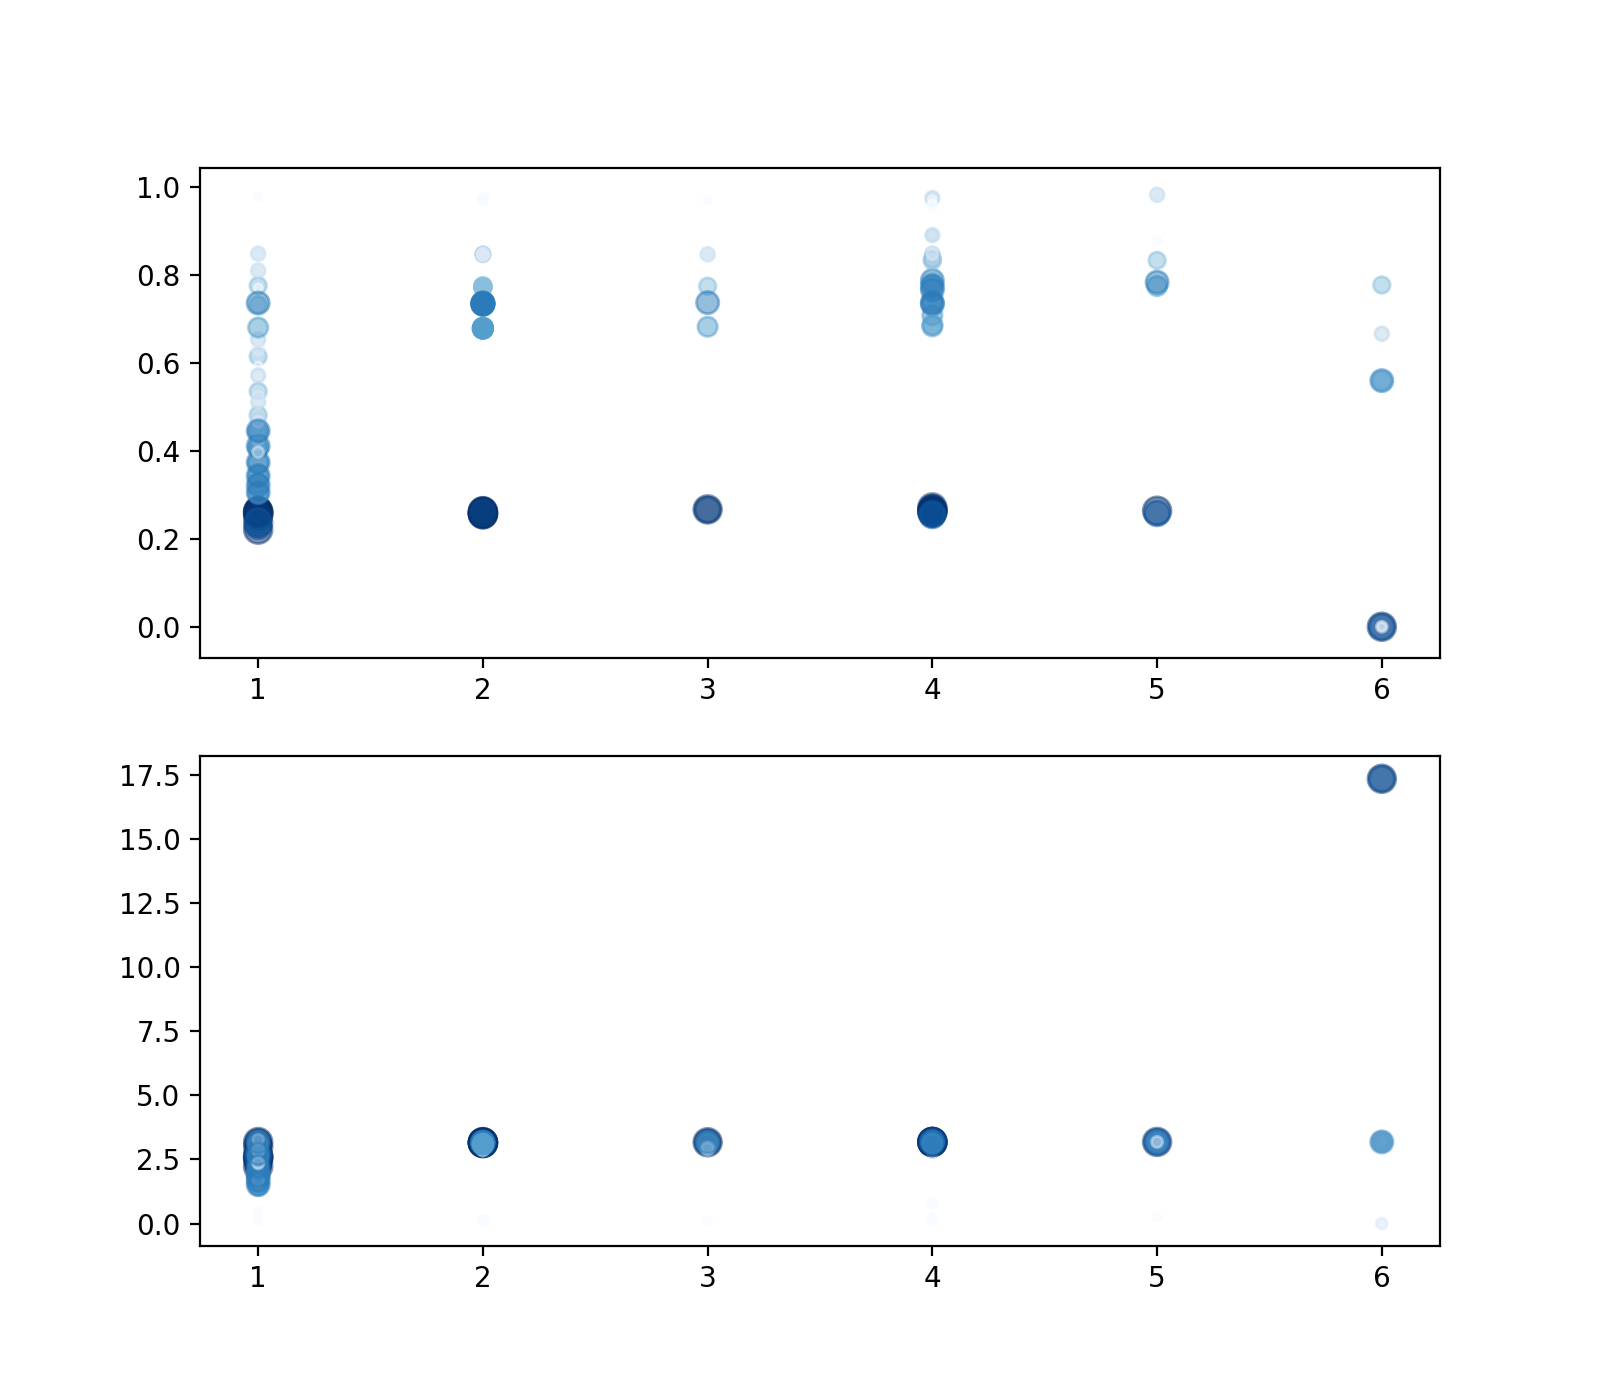

In [149]:
plt.rcParams['figure.figsize'] = [8, 7]
fig, ax = plt.subplots(2)

ax[0].scatter(x=df['method'].astype(int), y=df['FSFscore_min'], s=df['nAppliances'].astype(int)**2,c=df['nAppliances'].astype(int)*5, alpha = 0.5, cmap = 'Blues');

ax[1].scatter(x=df['method'].astype(int), y=df['MAPE_max'], s=df['nAppliances'].astype(int)**2,c=df['nAppliances'].astype(int)*5, alpha = 0.5, cmap = 'Blues');



<IPython.core.display.Javascript object>


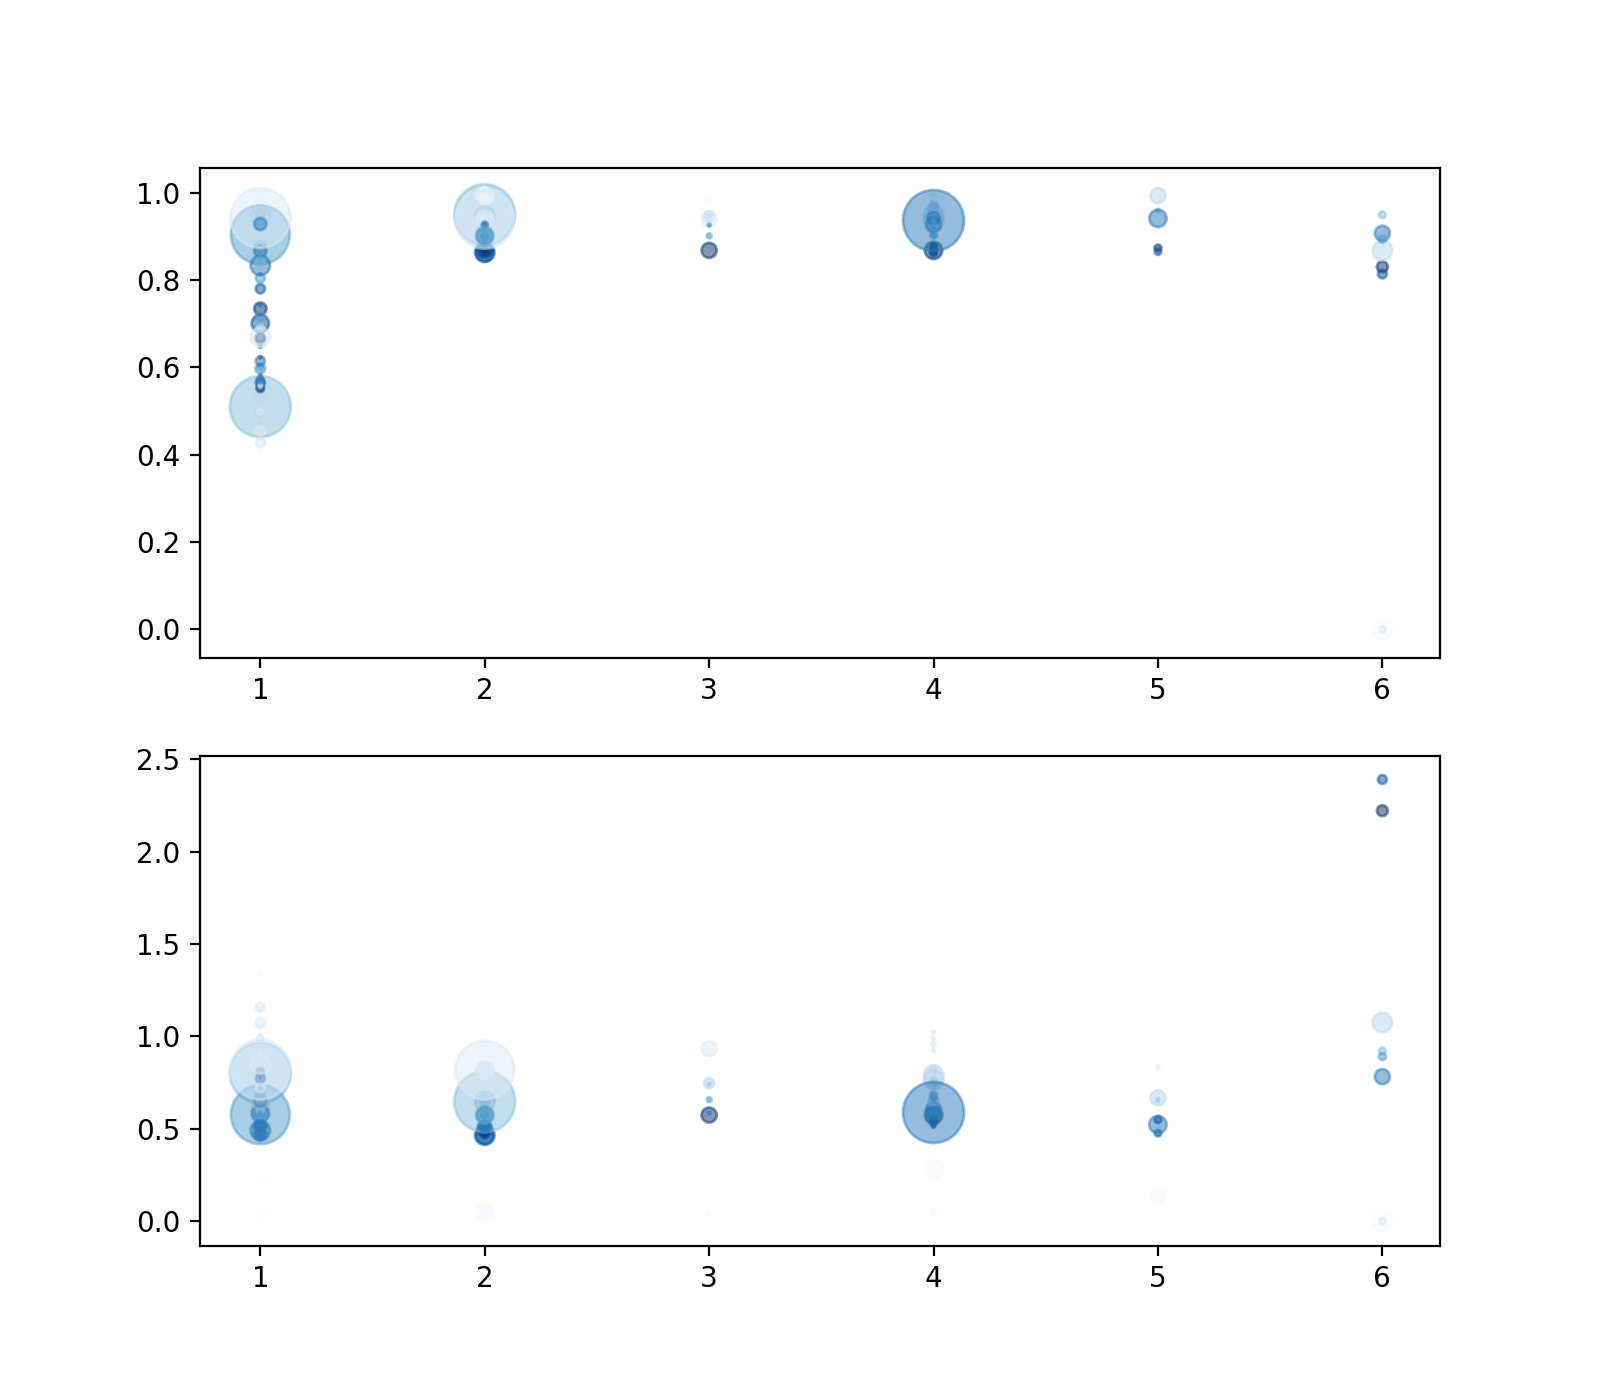

In [220]:
plt.rcParams['figure.figsize'] = [8, 7]
fig, ax = plt.subplots(2)

ax[0].scatter(x=df['method'].astype(int), y=df['FSFscore_mean'], s=df['bat'].astype(float)/1000,c=df['nAppliances'].astype(int)*5, alpha = 0.5, cmap = 'Blues');
ax[1].scatter(x=df['method'].astype(int), y=df['MAPE_mean'], s=df['bat'].astype(float)/1000,c=df['nAppliances'].astype(int)*5, alpha = 0.5, cmap = 'Blues');
plt.show()


<IPython.core.display.Javascript object>


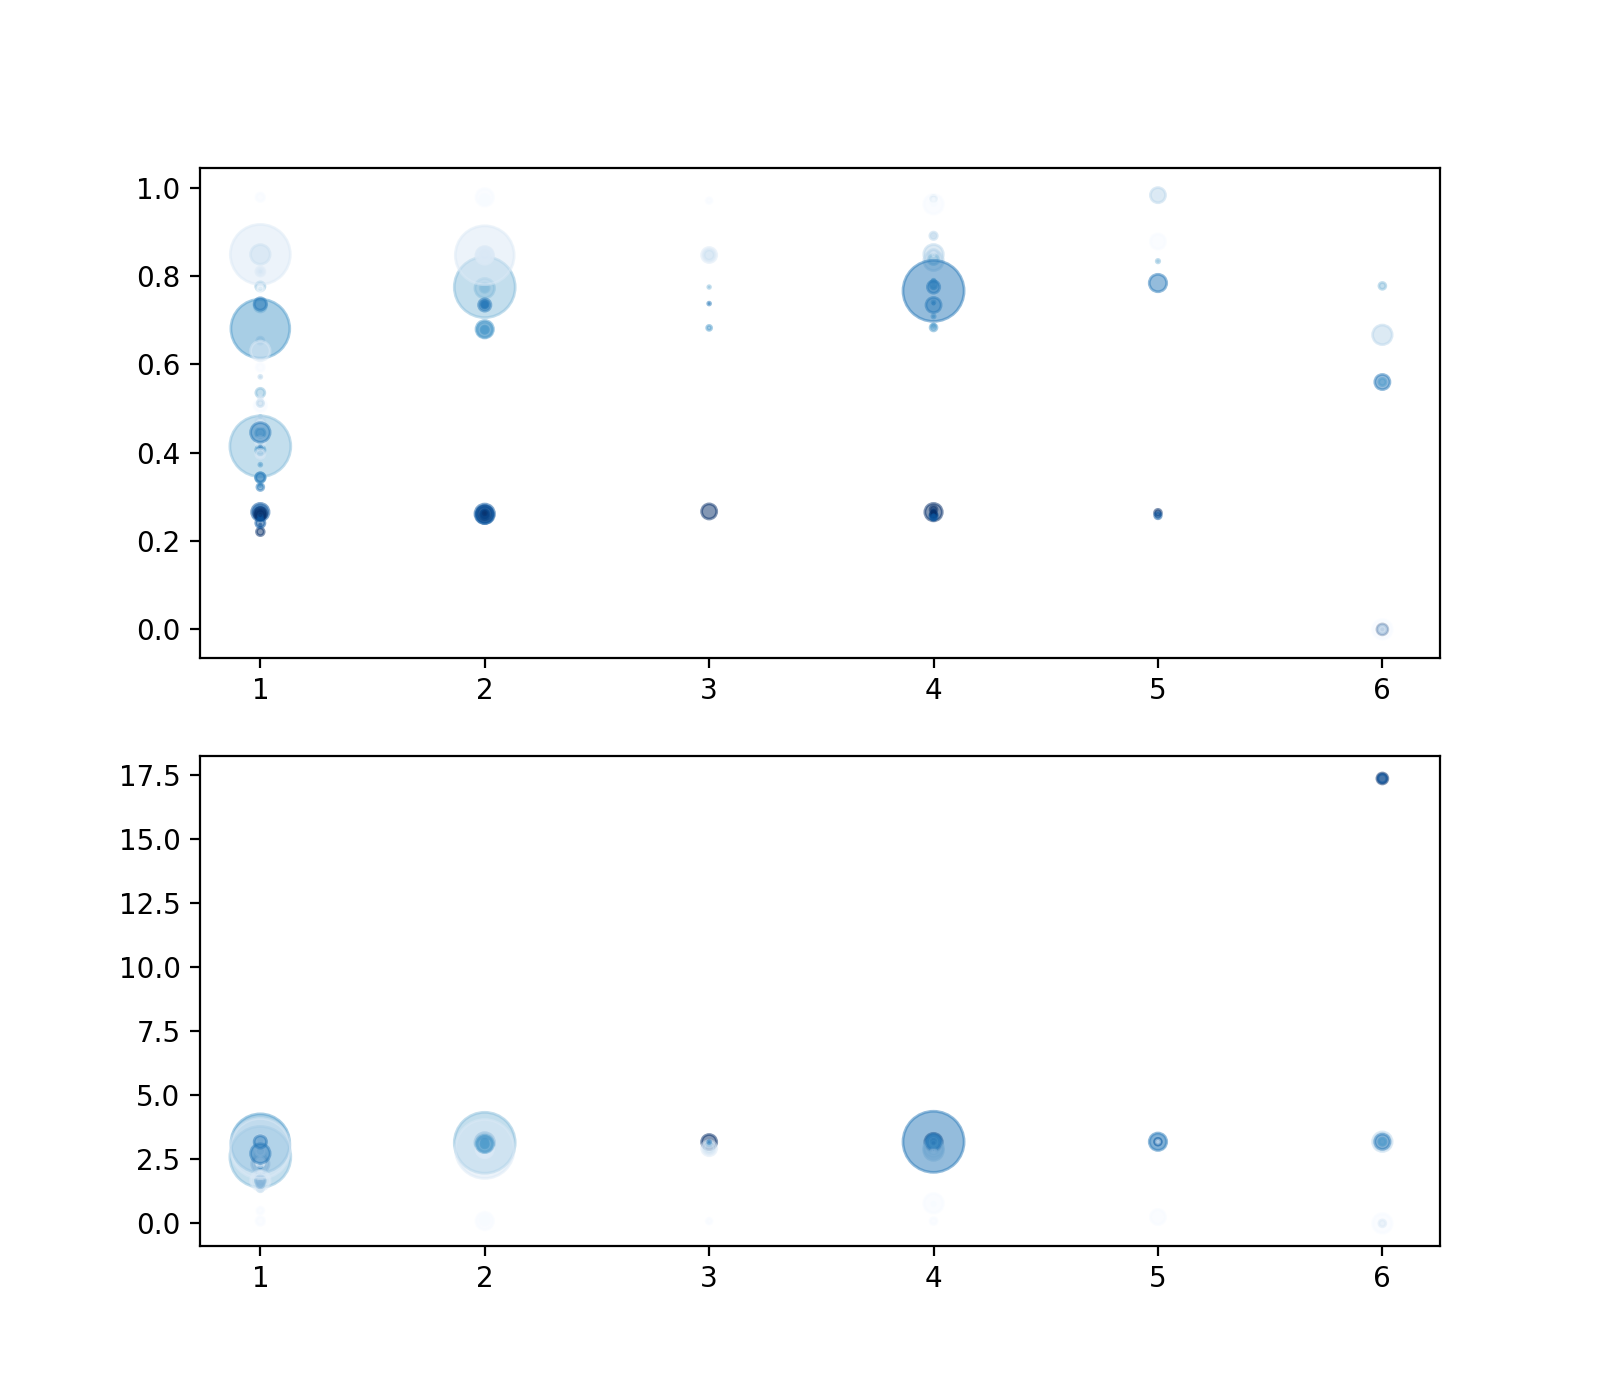

In [221]:
plt.rcParams['figure.figsize'] = [8, 7]
fig, ax = plt.subplots(2)

ax[0].scatter(x=df['method'].astype(int), y=df['FSFscore_min'], s=df['bat'].astype(float)/1000,c=df['nAppliances'].astype(int)*5, alpha = 0.5, cmap = 'Blues');

ax[1].scatter(x=df['method'].astype(int), y=df['MAPE_max'], s=df['bat'].astype(float)/1000,c=df['nAppliances'].astype(int)*5, alpha = 0.5, cmap = 'Blues');




170.81076660960022